In [1]:
! git clone https://github.com/ZER-0-NE/EAST-Detector-for-text-detection-using-OpenCV.git 

Cloning into 'EAST-Detector-for-text-detection-using-OpenCV'...
remote: Enumerating objects: 43, done.
remote: Total 43 (delta 0), reused 0 (delta 0), pack-reused 43
Unpacking objects: 100% (43/43), done.


In [2]:
cd EAST-Detector-for-text-detection-using-OpenCV/

/content/EAST-Detector-for-text-detection-using-OpenCV


In [3]:
from imutils.object_detection import non_max_suppression
import numpy as np
import argparse
import time
import cv2

In [24]:
image = cv2.imread("images/100.jpg")
orig = image.copy()
(H, W) = image.shape[:2]
(newW, newH) = (512,512)
rW = W / float(newW)
rH = H / float(newH)
image = cv2.resize(image, (newW, newH))
(H, W) = image.shape[:2]

In [6]:
layerNames = [
    "feature_fusion/Conv_7/Sigmoid",
    "feature_fusion/concat_3"]

In [7]:
print("[INFO] loading EAST text detector...")
net = cv2.dnn.readNet("frozen_east_text_detection.pb")

[INFO] loading EAST text detector...


In [8]:
blob = cv2.dnn.blobFromImage(image, 1.0, (W, H),
                             (123.68, 116.78, 103.94), swapRB=True, crop=False)
start = time.time()
net.setInput(blob)
(scores, geometry) = net.forward(layerNames)
end = time.time()

# show timing information on text prediction
print("[INFO] text detection took {:.6f} seconds".format(end - start))

[INFO] text detection took 1.753556 seconds


In [9]:
(numRows, numCols) = scores.shape[2:4]
rects = []
confidences = []

In [10]:
for y in range(0, numRows):
    # extract the scores (probabilities), followed by the geometrical
    # data used to derive potential bounding box coordinates that
    # surround text
    scoresData = scores[0, 0, y]
    xData0 = geometry[0, 0, y]
    xData1 = geometry[0, 1, y]
    xData2 = geometry[0, 2, y]
    xData3 = geometry[0, 3, y]
    anglesData = geometry[0, 4, y]

    # loop over the number of columns
    for x in range(0, numCols):
        # if our score does not have sufficient probability, ignore it
        if scoresData[x] < 0.5:
            continue

        # compute the offset factor as our resulting feature maps will
        # be 4x smaller than the input image
        (offsetX, offsetY) = (x * 4.0, y * 4.0)

        # extract the rotation angle for the prediction and then
        # compute the sin and cosine
        angle = anglesData[x]
        cos = np.cos(angle)
        sin = np.sin(angle)

        # use the geometry volume to derive the width and height of
        # the bounding box
        h = xData0[x] + xData2[x]
        w = xData1[x] + xData3[x]

        # compute both the starting and ending (x, y)-coordinates for
        # the text prediction bounding box
        endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
        endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
        startX = int(endX - w)
        startY = int(endY - h)

        # add the bounding box coordinates and probability score to
        # our respective lists
        rects.append((startX, startY, endX, endY))
        confidences.append(scoresData[x])

In [11]:
boxes = non_max_suppression(np.array(rects), probs=confidences)

In [12]:
for (startX, startY, endX, endY) in boxes:
    # scale the bounding box coordinates based on the respective
    # ratios
    startX = int(startX * rW)
    startY = int(startY * rH)
    endX = int(endX * rW)
    endY = int(endY * rH)

    # draw the bounding box on the image
    cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 2)

# show the output image
cv2.imwrite("Text_detect.jpg", orig)
cv2.waitKey(0)

-1

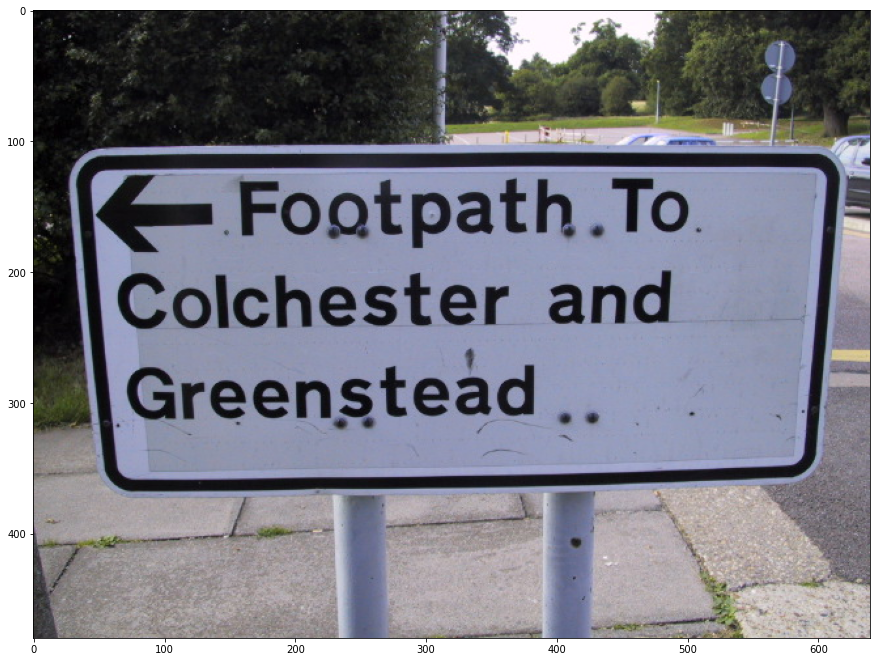

In [13]:
import matplotlib.pyplot as plt
import numpy as np
original_img = cv2.imread("images/100.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)

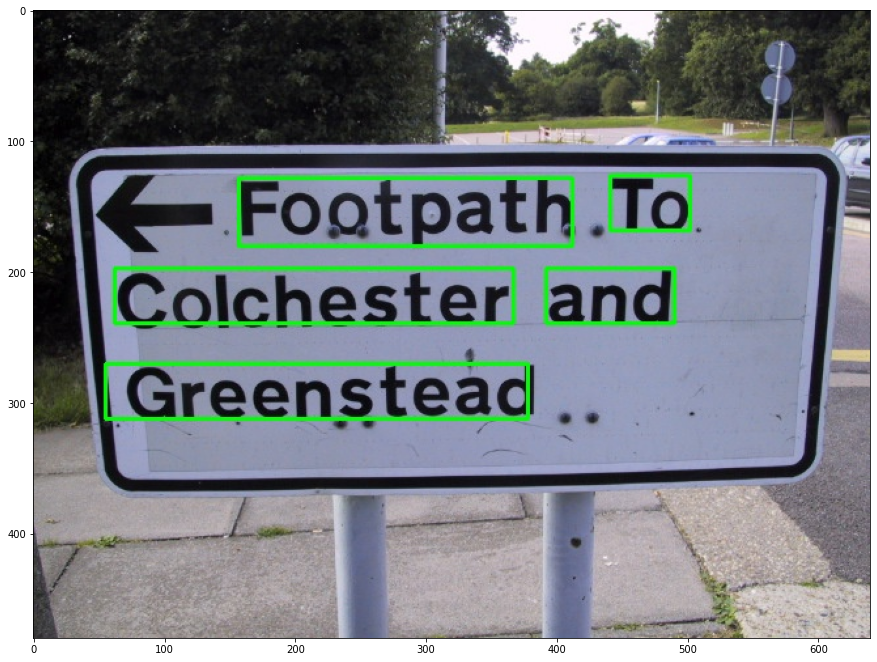

In [14]:
import matplotlib.pyplot as plt
import numpy as np
original_img = cv2.imread("Text_detect.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)

In [17]:
boxes

array([[126, 137, 330, 193],
       [ 44, 288, 303, 333],
       [ 50, 211, 294, 255],
       [314, 211, 392, 255],
       [353, 135, 402, 180]])

In [18]:
boxes_d=[]
for (startX, startY, endX, endY) in boxes:
    # scale the bounding box coordinates based on the respective
    # ratios
    startX = int(startX * rW)
    startY = int(startY * rH)
    endX = int(endX * rW)
    endY = int(endY * rH)
    boxes_d.append([startX,startY,endX,endY])
    # draw the bounding box on the image
    cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 2)

# show the output image
cv2.imwrite("Text_detect.jpg", orig)
cv2.waitKey(0)

-1

In [19]:
boxes_d

[[157, 128, 412, 180],
 [55, 270, 378, 312],
 [62, 197, 367, 239],
 [392, 197, 490, 239],
 [441, 126, 502, 168]]

In [16]:
!cat "images/gt_100.txt"

158 128 411 181 "Footpath"
443 128 501 169 "To"
64 200 363 243 "Colchester"
394 199 487 239 "and"
72 271 382 312 "Greenstead"


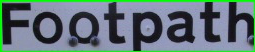

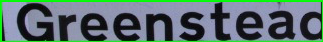

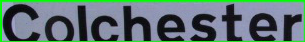

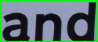

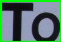

In [25]:
from PIL import Image 
image=Image.open('Text_detect.jpg') 
for i in range(len(boxes_d)):
  im = image.crop(boxes_d[i]) 
# Shows the image in image viewer 
  display(im)
#im1.save("new.jpg")